In [1]:
import os
import sys
import numpy as np
from scipy import signal as scipysig
from matplotlib import pyplot as plt

In [2]:
ROOT = ROOT = 'C:\\OneDrive - Netherlands eScience Center\\Project_ePodium\\time_series_generator'
sys.path.insert(0, ROOT)

import TS_generator as TSgen

## Simple test example

In [3]:
TS_def = {'class_name' : 'Simple example',
          'n_timepoints' : 400,
          'n_channels' : 6,
          'signal_defs' : [{'peaks_per_ch' : 1,
                           'channels' : [3,4,5],
                           'n_ch' : [2, 3],
                           'length' : [50,80],
                           'position' : [50,160],
                           'extra_shift' : [-10,10],
                           'amp' : [0.7,1],
                           'sign' : 1,
                           'signal_type' : 'peak_exponential'
                         }],
          'noise_defs' : [{'channels' : 'all',
                           'noise_amp' : [0.05,0.06],
                          'noise_type' : 'gaussian'
                         },
                         {'channels' : 'all',
                          'noise_amp' : [0.018,0.022],
                          'noise_type' : 'random_walk'
                         }]
          }

TS_def['noise_defs'][0]

{'channels': 'all', 'noise_amp': [0.05, 0.06], 'noise_type': 'gaussian'}

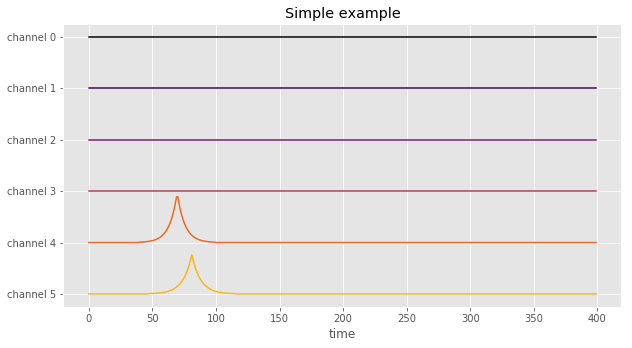

In [4]:
X = TSgen.generate_TS(TS_def,
                random_seed = None,
                ignore_noise = True)

TSgen.plot_TS(X, TS_def)

# General workflow:
## 1) Import time series classes from yaml files

In [5]:
PATH_classes = os.path.join(ROOT, 'TS_types')
filename = os.path.join(PATH_classes, 'TS_type_show_variety.yaml')

TS_def = TSgen.load_TS_class(filename)

Show variety
This file defines a test type for time series generation. It contains a wide variety of different signals and shapes. It also applies random walk and gaussian noise.

n_channels: 11
n_timepoints: 400


In [6]:
TS_def

{'class_name': 'Show variety',
 'description': 'This file defines a test type for time series generation. It contains a wide variety of different signals and shapes. It also applies random walk and gaussian noise.\n',
 'class_creator': 'Florian Huber',
 'last_updated': '05-03-2020',
 'n_channels': 11,
 'n_timepoints': 400,
 'noise_defs': [{'channels': 'all',
   'noise_amp': [0.05, 0.06],
   'noise_type': 'gaussian'},
  {'channels': [0, 1, 2, 3, 4, 5, 6],
   'noise_amp': [0.018, 0.022],
   'noise_type': 'random_walk'}],
 'shape_description': 'Cosine wave is added to two channels. One cosine for channel 9 and three interfering cosines for channel 10.  Channel 9 is in addition dempened by an exponential.\n',
 'shape_defs': [{'channels': [9, 10],
   'shape_amp': 0.4,
   'shape_iter': 8,
   'shape_shift': 0,
   'shape_type': 'cosine'},
  {'channels': [10],
   'shape_amp': [0.2, 0.3],
   'shape_iter': 11,
   'shape_shift': -10,
   'shape_type': 'cosine'},
  {'channels': [10],
   'shape_amp':

## 2) Generate time series based on class definition

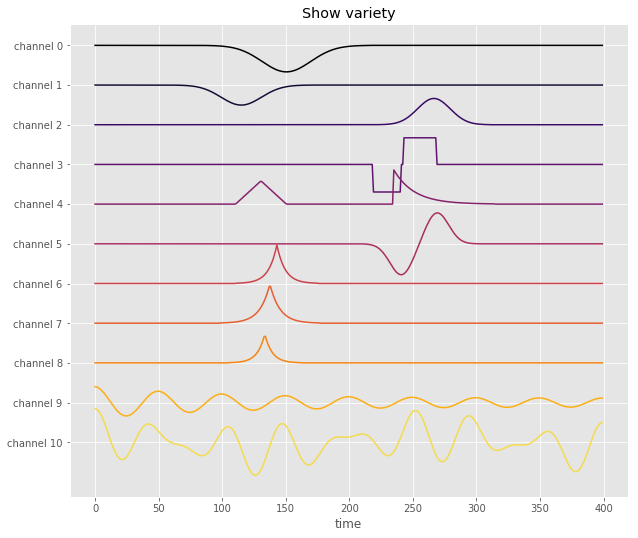

In [7]:
X = TSgen.generate_TS(TS_def,
                random_seed = None,
                ignore_noise = True)

TSgen.plot_TS(X, TS_def)

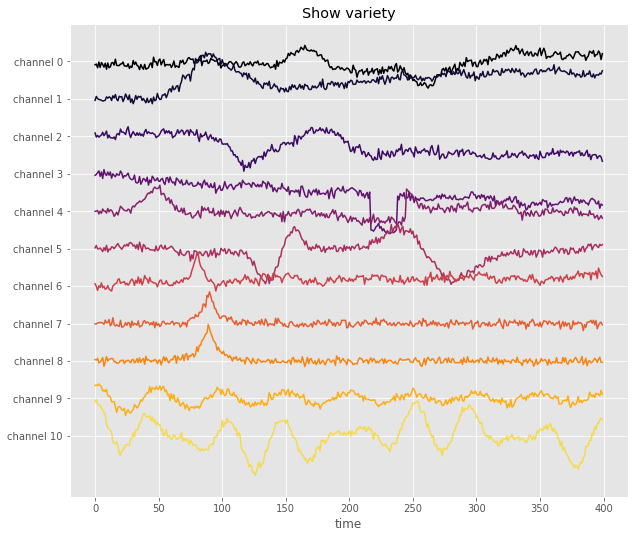

In [8]:
X = TSgen.generate_TS(TS_def,
                random_seed = None)

TSgen.plot_TS(X, TS_def)

## 3) Generate entire data set

In [9]:
X_data, y_data = TSgen.generate_dataset([filename],
                                      200,
                                      random_seed = None)

Show variety
This file defines a test type for time series generation. It contains a wide variety of different signals and shapes. It also applies random walk and gaussian noise.

n_channels: 11
n_timepoints: 400


In [10]:
X_data.shape

(200, 11, 400)

In [11]:
list(set(y_data))

['Show variety']